# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# exercise 1.1
data = pd.read_csv('../data/housing.csv')
df = data.copy()
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:>

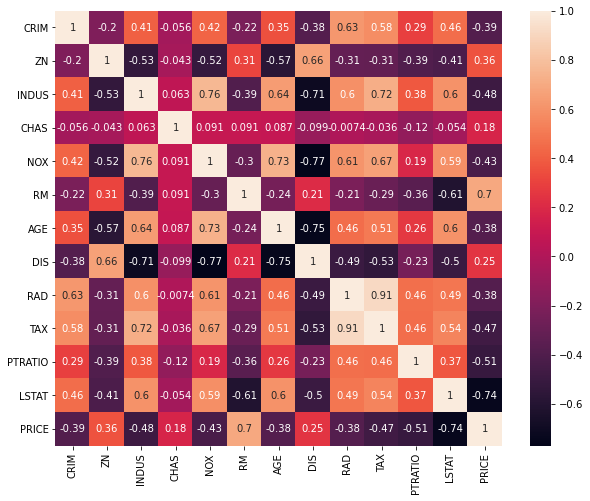

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True )#to find the effective factor on price by correlation

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

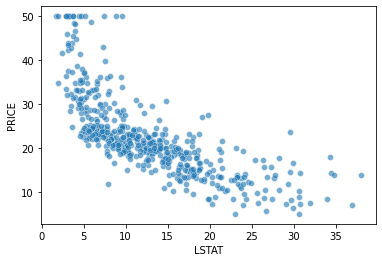

In [4]:

y = df['PRICE']
x1 = df['LSTAT']
sns.scatterplot(x1, y, alpha=.6)


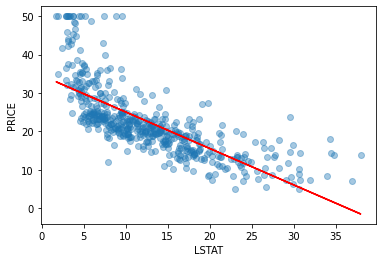

In [73]:
y = df['PRICE']
x1 = pd.DataFrame(df['LSTAT'])#has to be dataframe not Series 

model = LinearRegression(fit_intercept=True) #object for linearregression

model.fit(x1, y) #fit the model on data to predict y as price
yfit = model.predict(x1)

plt.plot(x1, yfit, 'red')
plt.scatter(x1, y, alpha=0.4)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

In [6]:
y = df['PRICE']
x2 = sm.add_constant(df['LSTAT'])#adding constant as intecept to improve R^2 and other statistical factors
est = sm.OLS(y, x2).fit()#fit data in statmodel for least squares function(L2)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           5.08e-88
Time:                        08:21:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:

x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT',]]
x = sm.add_constant(x)#adding constatnt as intercept to improve fitting model
est_t = sm.OLS(y, x).fit()#fit data in statmodel for loss function
#print('R_squared from summary table:')#r_squared denotes somhow X could explain y 
#est_t.summary()

In [8]:
print('"coefficients table"')
est_t.summary().tables[1]


"coefficients table"


,coef,std err,t,P>|t|,[0.025,0.975]
const,41.6173,4.936,8.431,0.000,31.919,51.316
CRIM,-0.1214,0.033,-3.678,0.000,-0.186,-0.057
ZN,0.0470,0.014,3.384,0.001,0.020,0.074
INDUS,0.0135,0.062,0.217,0.829,-0.109,0.136
CHAS,2.8400,0.870,3.264,0.001,1.131,4.549
NOX,-18.7580,3.851,-4.870,0.000,-26.325,-11.191
RM,3.6581,0.420,8.705,0.000,2.832,4.484
AGE,0.0036,0.013,0.271,0.787,-0.023,0.030
DIS,-1.4908,0.202,-7.394,0.000,-1.887,-1.095
RAD,0.2894,0.067,4.325,0.000,0.158,0.421


In [9]:
model.fit(x, y)
yt_fit = model.predict(x)#predict the target as price
model.coef_  #corficient by linear regression

array([ 0.00000000e+00, -1.21388618e-01,  4.69634633e-02,  1.34676947e-02,
        2.83999338e+00, -1.87580220e+01,  3.65811904e+00,  3.61071055e-03,
       -1.49075365e+00,  2.89404521e-01, -1.26819813e-02, -9.37532900e-01,
       -5.52019101e-01])

### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [65]:
# exercise 1.2
x_p = pd.DataFrame(df['LSTAT'])
x_p = np.concatenate([x_p, np.square(x_p), x_p**3], axis=1) #to make polynomial feature to improve the regression
x_p = sm.add_constant(x_p)
x_p

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       ...,
       [  1.      ,   5.64    ,  31.8096  , 179.406144],
       [  1.      ,   6.48    ,  41.9904  , 272.097792],
       [  1.      ,   7.88    ,  62.0944  , 489.303872]])

In [66]:

est_poly = sm.OLS(y, x_p).fit()#fit data in statmodel for loss function
est_poly.summary()#get summary of statistical info


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          1.78e-116
Time:                        08:56:00   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6496      1.435     33.909      0.000      45.831      51.468
x1            -3.8656      0.329    -11.757      0.000      -4.512      -3.220
x2             0.1487      0.021      6.983      0.000       0.107       0.191
x3            -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


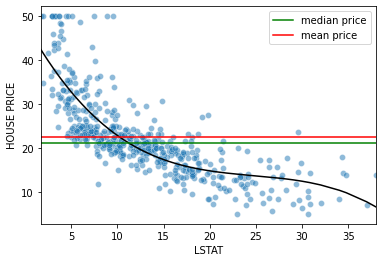

In [74]:
# exercise 1.3
y_p_fit  = est_poly.predict(x_p)#predicted y by statsmodel of loss function

sns.lineplot(x_p[:,1], y_p_fit, color='black')
sns.scatterplot(df['LSTAT'], y, alpha=.5)
plt.axhline(y = y.median(), color='g', label='median price')  #median of y
plt.axhline(y = y.mean(), color='red', label='mean price') #mean amount for y

plt.xlabel('LSTAT')
plt.ylabel('HOUSE PRICE')
plt.xlim(np.min(df['LSTAT']), np.max(df['LSTAT']))
plt.legend()

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpre

(<AxesSubplot:xlabel='INDUS', ylabel='PRICE'>,
 <AxesSubplot:xlabel='INDUS', ylabel='PRICE'>)

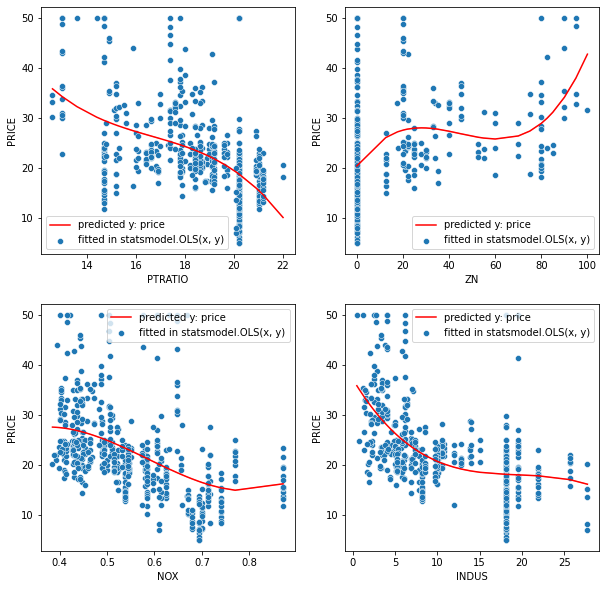

In [71]:
def reg_plot_on_ax(feature, axs):#to plot 4 features interms of house price
    xp = pd.DataFrame(df[feature])
    xp = np.concatenate([xp, np.square(xp), xp**3], axis=1) #to make polynomial feature to improve the regression
    xp = sm.add_constant(xp)
    est_poly = sm.OLS(y, xp).fit()
    yp_fit  = est_poly.predict(xp)#predicted y by statsmodel of loss function
    scatter =sns.scatterplot(df[feature], y,label='fitted in statsmodel.OLS(x, y)', ax=axs)
    line= sns.lineplot(xp[:,1], yp_fit, color='red',label='predicted y: price', ax=axs)
    plt.legend()
    return scatter, line

fig,axs = plt.subplots(2,2, figsize=(10, 10))

reg_plot_on_ax('PTRATIO', axs[0, 0])
reg_plot_on_ax('ZN', axs[0, 1])
reg_plot_on_ax('NOX', axs[1, 0])
reg_plot_on_ax('INDUS', axs[1, 1])